## 1. Rule-based classification

/home/htic/raisa
525 525 3


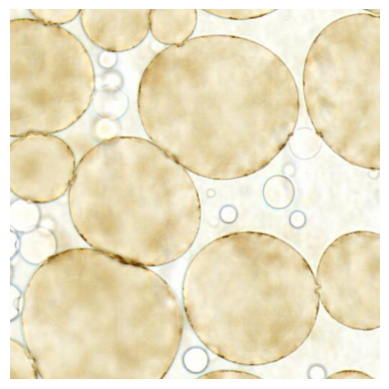

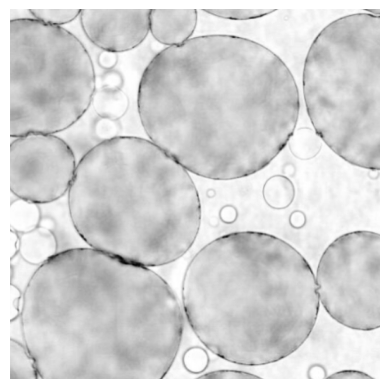

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print(os.getcwd())

#resize
img = cv2.imread("/home/htic/raisa/idk-what-this-is-1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height,width,channels=img.shape
#print(f"{height} {width} {channels}")
#525 527 3

img=cv2.resize(img,(525,525))
height,width,channels=img.shape
print(f"{height} {width} {channels}")

#rgb image
plt.imshow(img)
plt.axis('off')
plt.show()

#grayscale image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()


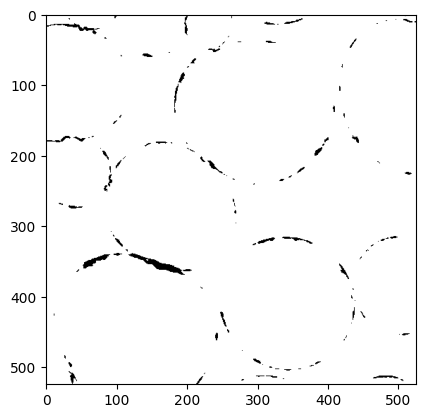

In [39]:
#using CLAHE- Contrast Limited Adaptive Histogram Equalization 
# (manual threshold)

clahe = cv2.createCLAHE(clipLimit=5)
clahe_img = np.clip(clahe.apply(img_gray) + 20, 0, 255).astype(np.uint8)
_, threshold_img = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_img,cmap='gray')
# otsu_thresh=threshold_img

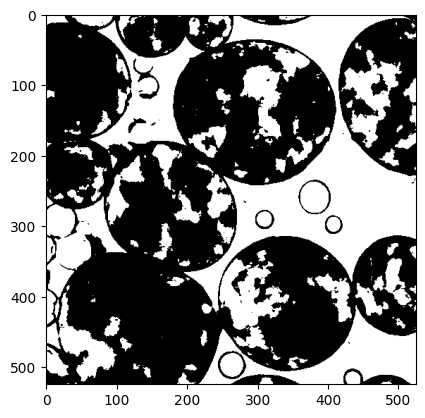

In [16]:
#Otsu’s (cluster variance maximization) thresholding method
# (computed threshold)

_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_thresh,cmap='gray')

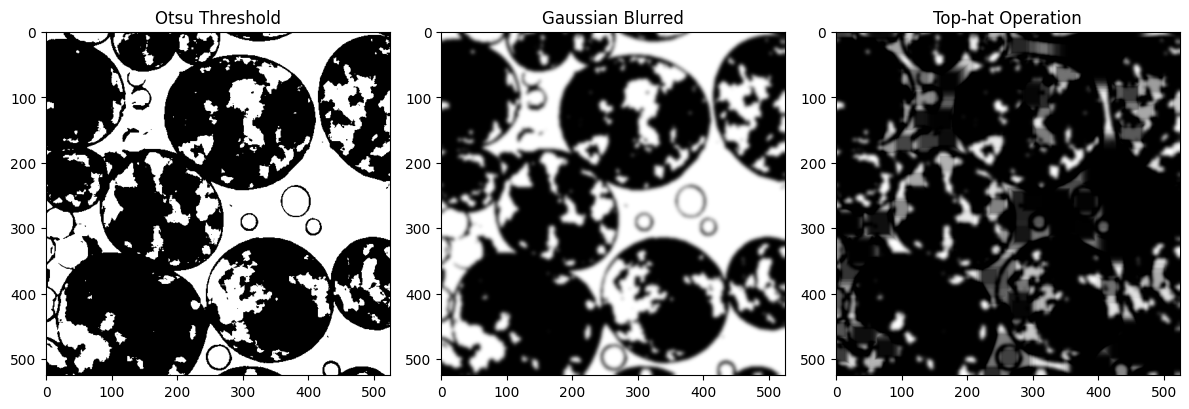

In [28]:
#gaussain filtering and top hat operations
otsu_thresh=~otsu_thresh
blurred = cv2.GaussianBlur(otsu_thresh, (17, 17), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21,21))
tophat = cv2.morphologyEx(blurred, cv2.MORPH_TOPHAT, kernel)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu Threshold')
plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Gaussian Blurred')
plt.subplot(1, 3, 3)
plt.imshow(tophat, cmap='gray')
plt.title('Top-hat Operation')
plt.tight_layout()
plt.show()

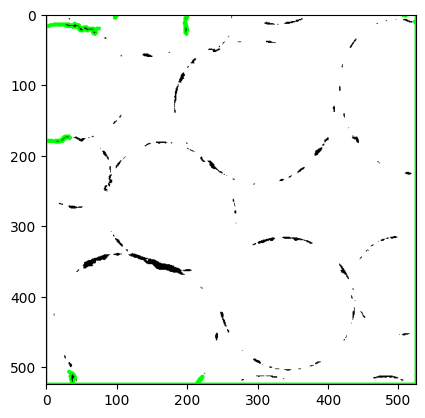

In [20]:
#size threshold 

contours, _ = cv2.findContours(threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 0]
result = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, filtered_contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

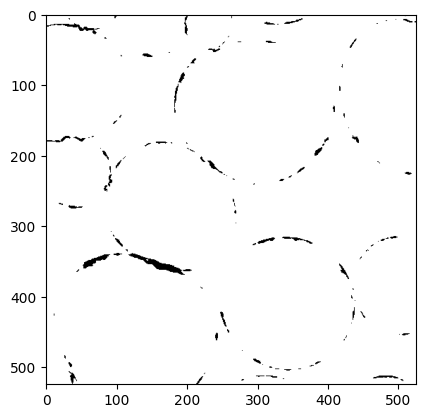

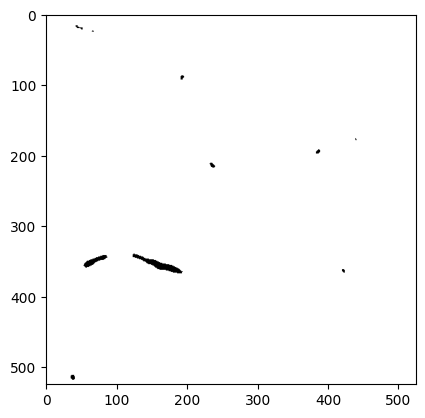

In [40]:
#green
plt.imshow(threshold_img,cmap='gray')
plt.show()
# result=cv.fastNlMeansDenoising()(otsu_thresh, None, 10, 10, 7, 21)
result = cv2.medianBlur(threshold_img, 9)
plt.imshow(result,cmap='gray')
plt.show()

In [38]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

#calculating dark pixel ratio (density)
from keras.preprocessing.image import img_to_array
arrayimg=img_to_array(result)
pixel_ratio=np.sum(arrayimg)/arrayimg.size
#max value=255, min value=0
print((255-pixel_ratio)*100/255)

100.0
